В данной задаче, также как в задаче 161. ГенераторТочекВКруге, было необходимо найти некоторую особенность, статистику или что-то иное, чтобы разделить выборки. В данном случае оказалось, что в случае творческого метода генерации перестановок (StupidPermutation) частота числа i на позиции i значительно выше чем на остальных 7 позициях.
То есть если вам дадут последовательность, сгенерированную творческим методом, то посчитав количество 0 стоящих на позиции 0, 1 на позиции 1 и так далее вы сможете увидеть, что их больше чем в случае с обычным методом генерации. Если же отсортировать данный вам набор по этому признаку, то можно будет получить ответ на вопрос задачи, потому что с большой вероятностью у творческих наборов этот признак будет больше, чем у обычных.

P.S. Я оставил некоторые клетки, в которых считал статистики, как в задаче 161, но на них можно не обращать внимание, потому что как вы сможете увидеть по значениям они не сильно различаются.

In [1]:
import numpy as np
import pandas as pd

df = pd.read_table('permutations.in',header=None,sep=' ')

In [2]:
train_df = df[:2000]

In [3]:
import random

def StupidPermutation():
    partialSums = [0,1,8,35,111,285,
                   628,1230,2191,3606,5546,8039,11056,14506,18242,
                   22078,25814,29264,32281,34774,36714,38129,39090,
                   39692,40035,40209,40285,40312,40319,40320]
    r = random.randint(0, partialSums[-1])
    numInv = 0
    while partialSums[numInv] < r:
        numInv += 1
    perm = list(range(8))
    for step in range(numInv):
        t1 = random.randint(0, 7)
        t2 = random.randint(0, 7)
        perm[t1], perm[t2] = perm[t2], perm[t1]
    return perm

In [4]:
def RandomPermutation():
    perm = list(range(8))
    random.shuffle(perm)
    return perm

In [5]:
data_stupid = [StupidPermutation() for _ in range(1000)]

In [6]:
data_norm = [RandomPermutation() for _ in range(1000)]

In [7]:
import numpy as np
data_stupid =np.array(data_stupid)
data_norm = np.array(data_norm)

In [8]:
for i in range(8):
    print(f'{i}:mean={data_stupid[:,i].mean()}  std={data_stupid[:,i].std()}')

0:mean=3.436  std=2.3323601780171086
1:mean=3.323  std=2.2673047876278125
2:mean=3.508  std=2.2081521686695416
3:mean=3.573  std=2.2650984526064204
4:mean=3.486  std=2.264465499847591
5:mean=3.442  std=2.2712630847174
6:mean=3.51  std=2.336642890986982
7:mean=3.722  std=2.360660077181804


In [9]:
for i in range(8):
    print(f'{i}:mean={data_norm[:,i].mean()}  std={data_norm[:,i].std()}')

0:mean=3.553  std=2.2757836013118644
1:mean=3.507  std=2.320765175540171
2:mean=3.491  std=2.303458052580945
3:mean=3.548  std=2.31553363180067
4:mean=3.438  std=2.228487379367449
5:mean=3.428  std=2.3101549731565627
6:mean=3.525  std=2.2202195837349064
7:mean=3.51  std=2.349446743384493


E:\anaconda3\envs\with_torch_cuda\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


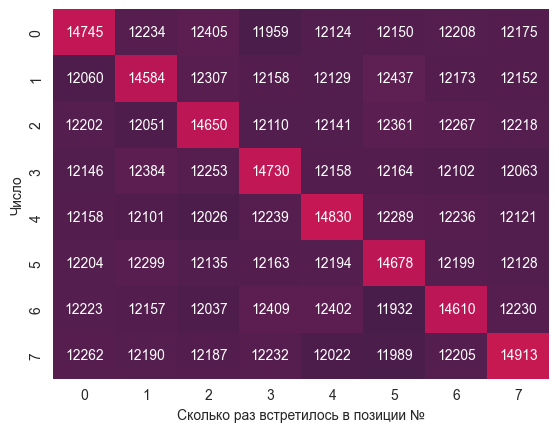

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
counts = pd.get_dummies(pd.DataFrame([StupidPermutation() for i in range(100000)]).stack().astype(object)) \
    .groupby(level=1) \
    .sum() \
    .astype(int)
ax = sns.heatmap(counts, annot=True, fmt='d', cbar=False,
                 vmin=10000, vmax=20000)

ax.set_xlabel('Сколько раз встретилось в позиции №')
ax.set_ylabel('Число')
plt.show()

In [30]:
suspecious_permutations = (df[0] == 0) | (df[1] == 1) | (df[2] == 2) | (df[3] == 3) \
                        | (df[4] == 4) | (df[5] == 5) | (df[6] == 6) | (df[7] == 7)

In [31]:
suspecious_permutations_count = suspecious_permutations.rolling(window=1000) \
    .sum()[999::1000] \
    .astype(int) \
    .to_frame() \
    .reset_index(drop=True) \
    .sort_values(0) \
    .rename({0: 'count'}, axis=1)

In [32]:
np.savetxt('out.txt', suspecious_permutations_count.index.values, '%d')